In [12]:
import tensorflow
from tensorflow.keras import  layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
data_dir ='./garbage-dataset'

In [17]:
train_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.2)

In [18]:
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 15813 images belonging to 10 classes.


In [19]:
validation_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3949 images belonging to 10 classes.


In [23]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\hisha\Desktop\New\Garbage-Classification\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=4,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // validation_gen.batch_size
)

Epoch 1/4
494/494 ━━━━━━━━━━━━━━━━━━━━ 923s 2s/step - accuracy: 0.5132 - loss: 1.4672 - val_accuracy: 0.6047 - val_loss: 1.1966
Epoch 2/4
  1/494 ━━━━━━━━━━━━━━━━━━━━ 7:13 880ms/step - accuracy: 0.3438 - loss: 1.5812

c:\Users\hisha\Desktop\New\Garbage-Classification\myenv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


494/494 ━━━━━━━━━━━━━━━━━━━━ 57s 114ms/step - accuracy: 0.3438 - loss: 1.5812 - val_accuracy: 0.5772 - val_loss: 1.2705
Epoch 3/4
494/494 ━━━━━━━━━━━━━━━━━━━━ 668s 1s/step - accuracy: 0.6743 - loss: 0.9703 - val_accuracy: 0.6692 - val_loss: 0.9874
Epoch 4/4
494/494 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.5312 - loss: 1.1418 - val_accuracy: 0.6692 - val_loss: 0.9800


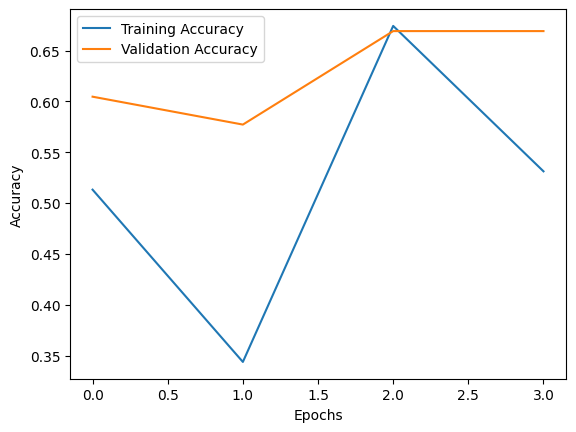

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

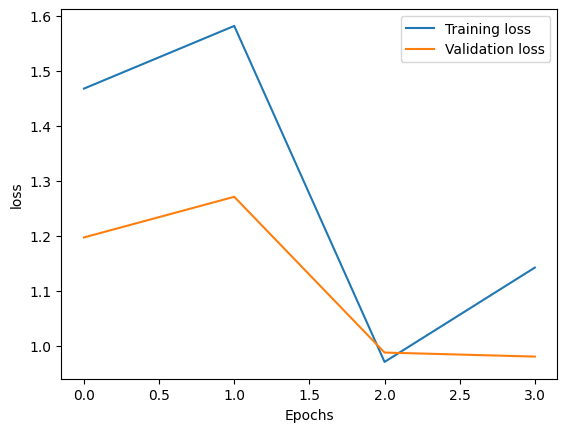

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
loss, acc = model.evaluate(validation_gen, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc*100:.2f}%")


124/124 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - accuracy: 0.6685 - loss: 0.9824
Validation Loss: 0.9824
Validation Accuracy: 66.85%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


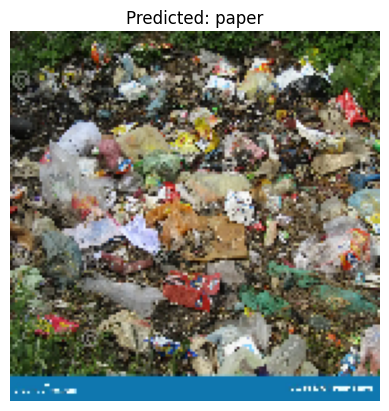

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "./test/test4.jpg"

img = image.load_img(img_path, target_size=(150, 150))  
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
class_labels = list(train_gen.class_indices.keys())
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {class_labels[class_idx]}")
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [03:22<00:00, 112kB/s]



image 1/1 C:\Users\hisha\Desktop\New\Garbage-Classification\test4.jpg: 544x640 (no detections), 575.1ms
Speed: 21.0ms preprocess, 575.1ms inference, 11.9ms postprocess per image at shape (1, 3, 544, 640)


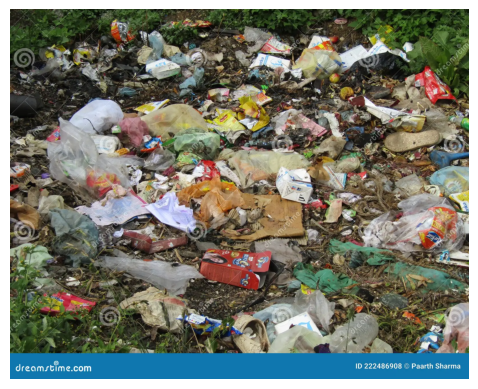

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolov8s.pt")  

results = model("test4.jpg")

for r in results:
    im_bgr = r.plot()  
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis("off")
    plt.show()
